In [5]:
import torch
from ultralytics import YOLO
from IPython.display import display
from PIL import Image

train_on_gpu = torch.cuda.is_available()
torch.cuda.empty_cache()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

model1 = YOLO("runs/detect/train3/weights/best.pt")

model2 = YOLO("yolov8n.pt").to('cuda')
#model2.train(data='my_dataset2.yaml', 
#            epochs=30, 
#            imgsz=1024, 
#            batch=12, 
#            workers=4, 
#            #close_mosaic=-1, 
#            hsv_h=0.015, 
#            hsv_s=0.5, 
#            hsv_v= 0.4,
#            mixup=0.2,
#            dropout= 0.4,
#            auto_augment='autoaugment', 
#            scale=0.7,
#            device='cuda')

CUDA is available!  Training on GPU ...



image 1/1 /home/bchen/csci611/CSCI611_Spring25_Boxi_Chen/temp1.jpg: 480x640 (no detections), 10.8ms
Speed: 3.3ms preprocess, 10.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /home/bchen/csci611/CSCI611_Spring25_Boxi_Chen/temp1.jpg: 480x640 1 person, 1 car, 10.3ms
Speed: 3.0ms preprocess, 10.3ms inference, 2.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /home/bchen/csci611/CSCI611_Spring25_Boxi_Chen/temp1.jpg: 480x640 (no detections), 8.9ms
Speed: 3.3ms preprocess, 8.9ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /home/bchen/csci611/CSCI611_Spring25_Boxi_Chen/temp2.jpg: 384x640 1 red_light, 9.2ms
Speed: 2.5ms preprocess, 9.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/bchen/csci611/CSCI611_Spring25_Boxi_Chen/temp2.jpg: 384x640 1 person, 2 cars, 1 traffic light, 1 stop sign, 8.9ms
Speed: 2.9ms preprocess, 8.9ms inference, 2.3ms postprocess per image at shape (1, 3,

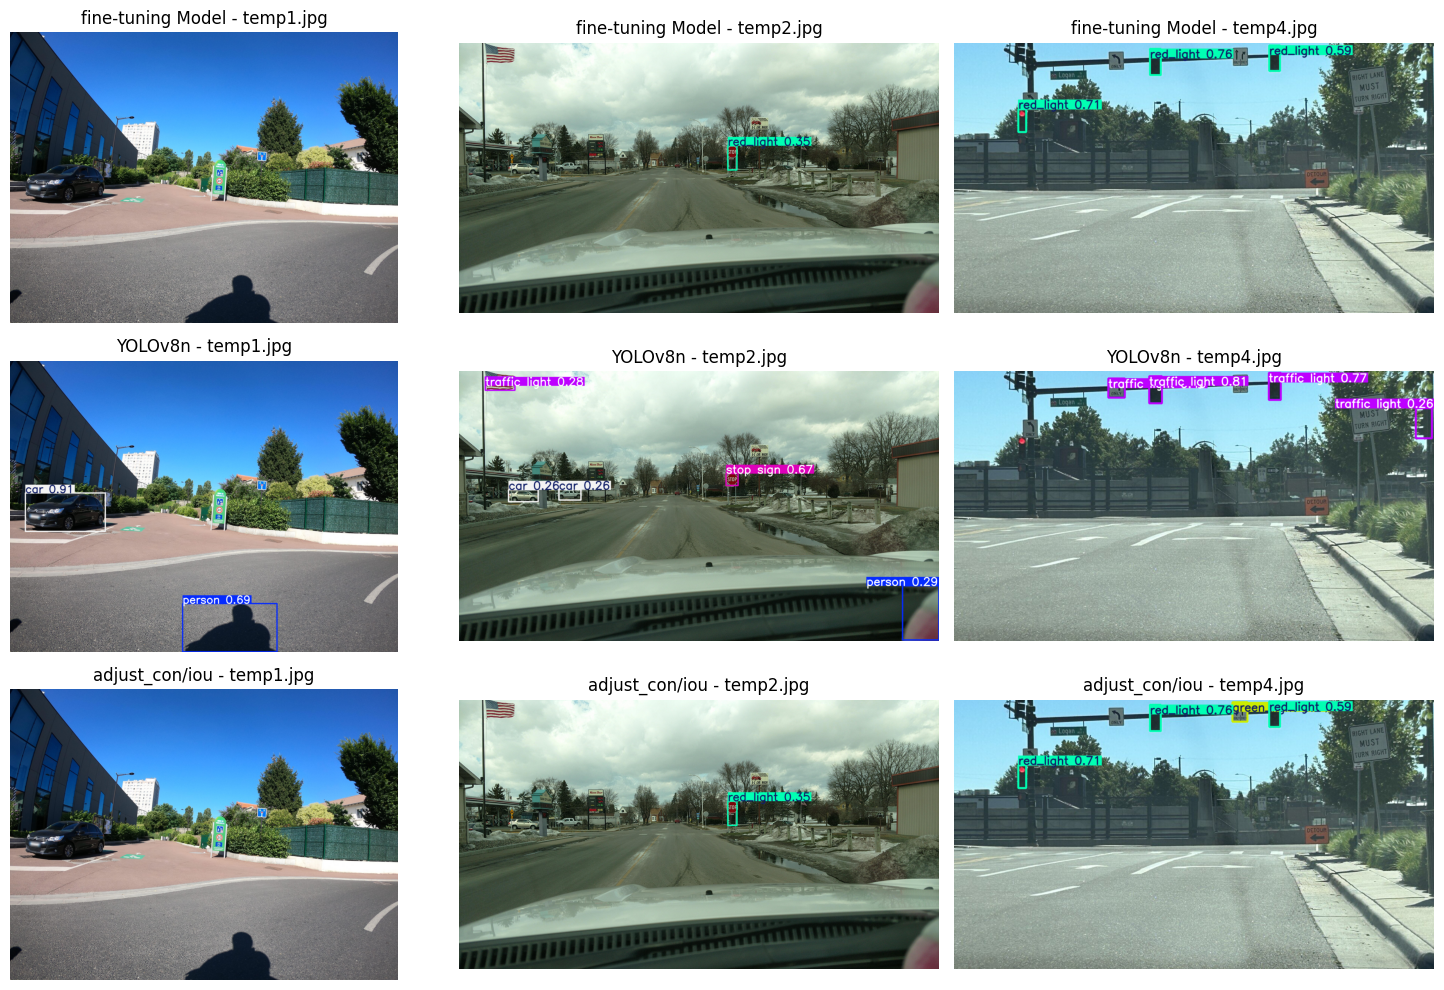

In [6]:
import matplotlib.pyplot as plt
import cv2

image_paths = ["temp1.jpg", "temp2.jpg", "temp4.jpg"]

fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for i, image_path in enumerate(image_paths):
    results1 = model1(image_path)
    img1 = results1[0].plot()
    
    results2 = model2(image_path)
    img2 = results2[0].plot()

    results3 = model1(image_path, conf=0.1, iou=0.4)
    img3 = results3[0].plot()
    
    axes[0, i].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    axes[0, i].set_title(f"fine-tuning Model - {image_path}")
    axes[0, i].axis("off")

    axes[1, i].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    axes[1, i].set_title(f"YOLOv8n - {image_path}")
    axes[1, i].axis("off")
    
    axes[2, i].imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
    axes[2, i].set_title(f"adjust_con/iou - {image_path}")
    axes[2, i].axis("off")

plt.tight_layout()
plt.draw()
plt.show()